In [26]:
import pandas as pd
import numpy as np
from scipy.stats import gamma,norm
from datetime import datetime
import matplotlib.pyplot as plt
import os
import geopandas as gpd
from scipy.interpolate import griddata

In [27]:
start_yr=int(input("please enter start year: "))
start_mon=int(input("please enter start month: "))
end_yr=int(input("please enter end year: "))
end_mon=int(input("please enter end month: "))
SPI_num=int(input("please enter the SPI type (1-12): "))

start_date = datetime(start_yr,start_mon,1)
end_date = datetime(end_yr,end_mon,1)

In [28]:
def find_spi(file_path):    
    df = pd.read_csv(file_path)

    df['Dates'] = pd.to_datetime(df['Dates'])
    df['Month'] = df['Dates'].dt.month
    df['Year'] = df['Dates'].dt.year

    filtered_df = df[(df['Dates'] >= start_date) & (df['Dates'] <= end_date)]
    filtered_dates=filtered_df['Dates']
    filtered_dates=filtered_dates[SPI_num-1:]

    date_objects = pd.to_datetime(filtered_dates)
    date_objects = [date.strftime('%b-%Y') for date in date_objects]

    rainfall_data = filtered_df['ACTUAL (mm) '].to_numpy()
    rainfall_data = np.convolve(rainfall_data, np.ones(SPI_num)/SPI_num, mode='valid')

    process_data = pd.to_numeric(rainfall_data, errors='coerce')
    process_data[process_data == 0] = 1e-15
    process_data = np.array(process_data)
    process_data = process_data[~np.isnan(process_data)]

    params = gamma.fit(process_data,floc=0)
    shape, loc, scale = params

    spi_vals = norm.ppf(gamma.cdf(process_data, shape, loc=0, scale=scale))

    return spi_vals, date_objects



In [36]:
def find_drought_period_indices(spi_values):
    drought_periods = []
    current_drought_period = []

    for i, spi in enumerate(spi_values):
        if spi < 0:
            current_drought_period.append(i)
        elif current_drought_period:
            drought_periods.append(current_drought_period)
            current_drought_period = []

    if current_drought_period:
        drought_periods.append(current_drought_period)

    longest_drought_period_indices = max(drought_periods, key=len)
    return longest_drought_period_indices

def plot_spi_with_drought_highlighted(spi_values,date_objects,file_name):
    indices = np.arange(len(spi_values))
    longest_drought_period_indices = find_drought_period_indices(spi_values)

    plt.figure(figsize=(10, 6))
    plt.plot(date_objects, spi_values, color='black', label='SPI Line', linewidth=1)
    
    if longest_drought_period_indices:
        start_index = longest_drought_period_indices[0]
        end_index = longest_drought_period_indices[-1]

        plt.fill_between(date_objects[start_index:end_index+1], spi_values[start_index:end_index+1],
                         color='red', alpha=0.3, label='Drought Period')
        
    plt.fill_between(date_objects, spi_values, where=(spi_values <0), color='blue', alpha=0.5, label='Negative SPI')
    plt.fill_between(date_objects, spi_values, where=(spi_values >0), color='orange', alpha=0.5, label='Positive SPI')

    plt.xlabel('Time')
    plt.ylabel('SPI Values')
    plt.title(f'SPI Over Time for {file_name}')
    plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    plt.xticks(date_objects, rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f'The largest drought period in {file_name} is from {date_objects[start_index]} till {date_objects[end_index]}')




/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


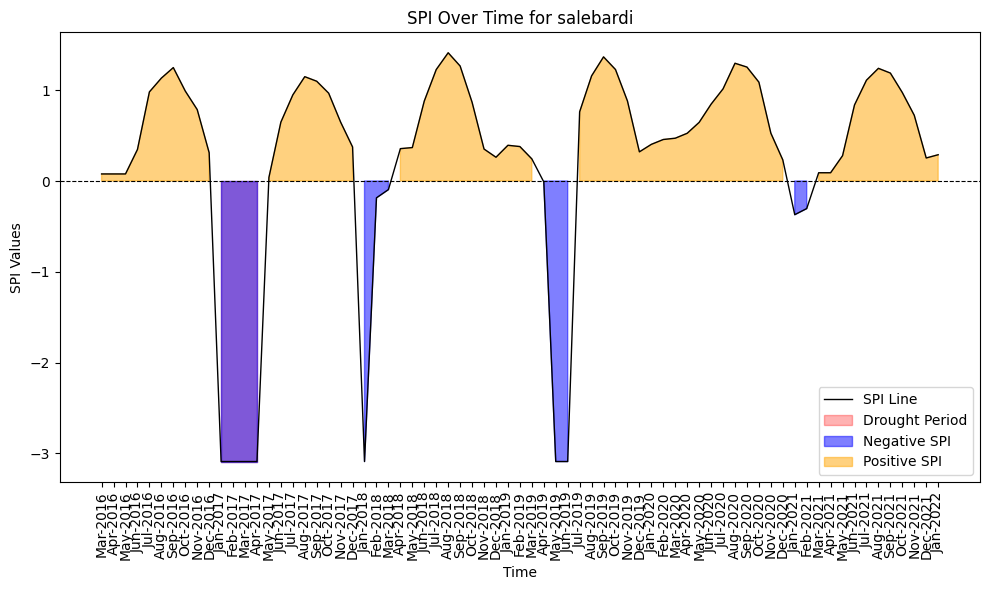

/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


The largest drought period in salebardi is from Jan-2017 till Apr-2017


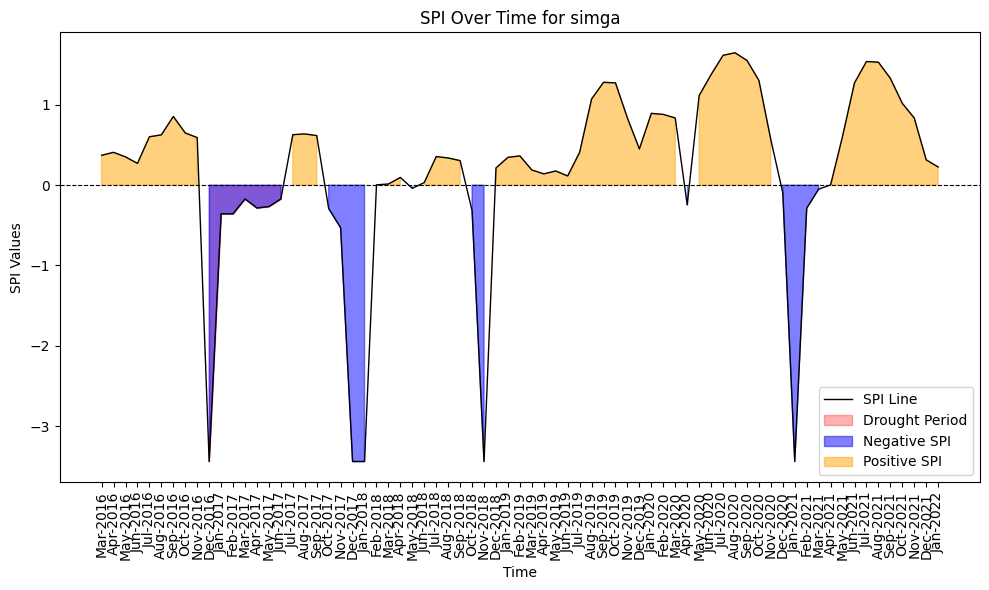

The largest drought period in simga is from Dec-2016 till Jun-2017


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


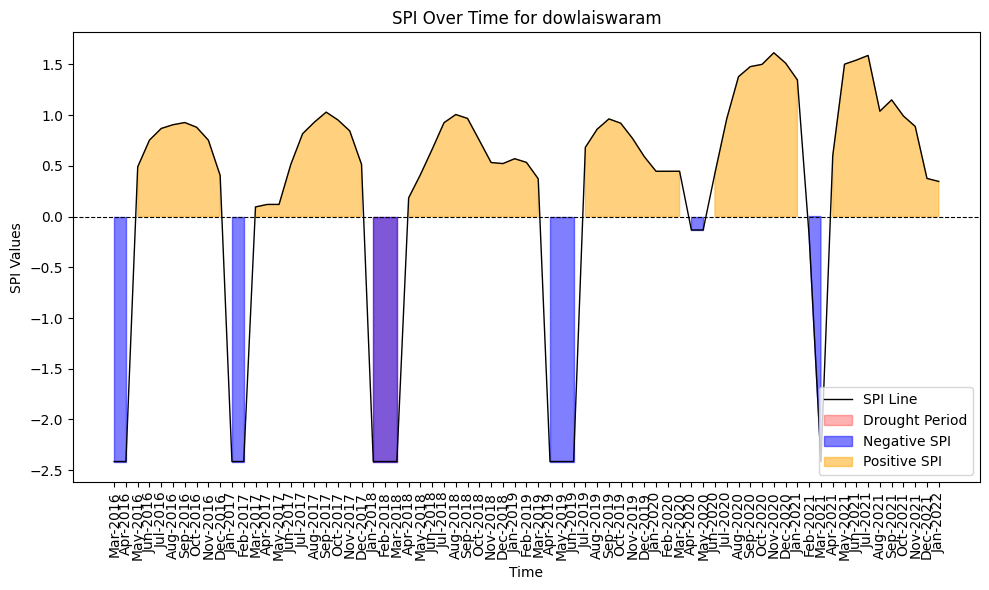

The largest drought period in dowlaiswaram is from Jan-2018 till Mar-2018


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


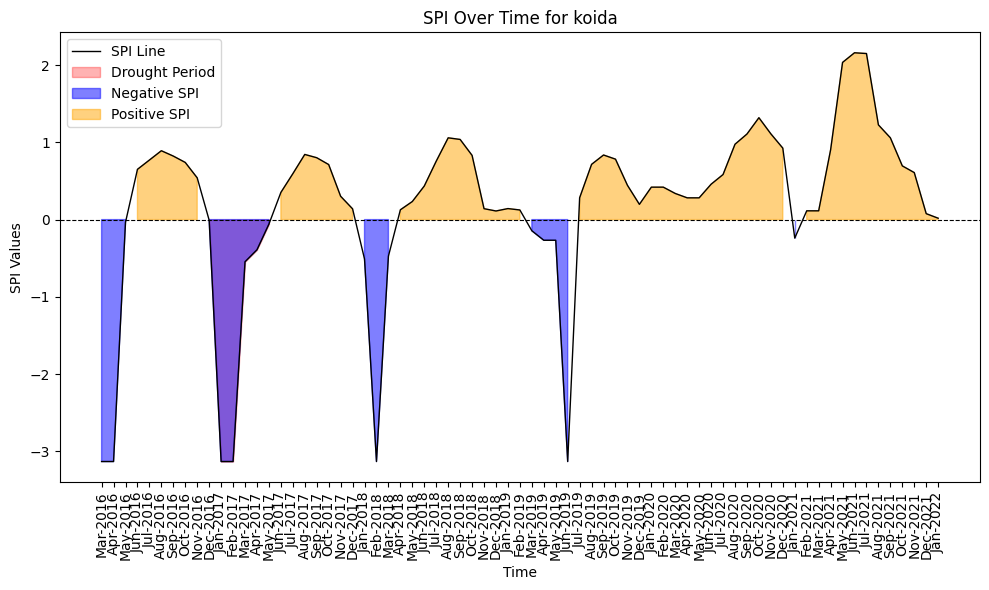

The largest drought period in koida is from Dec-2016 till May-2017


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


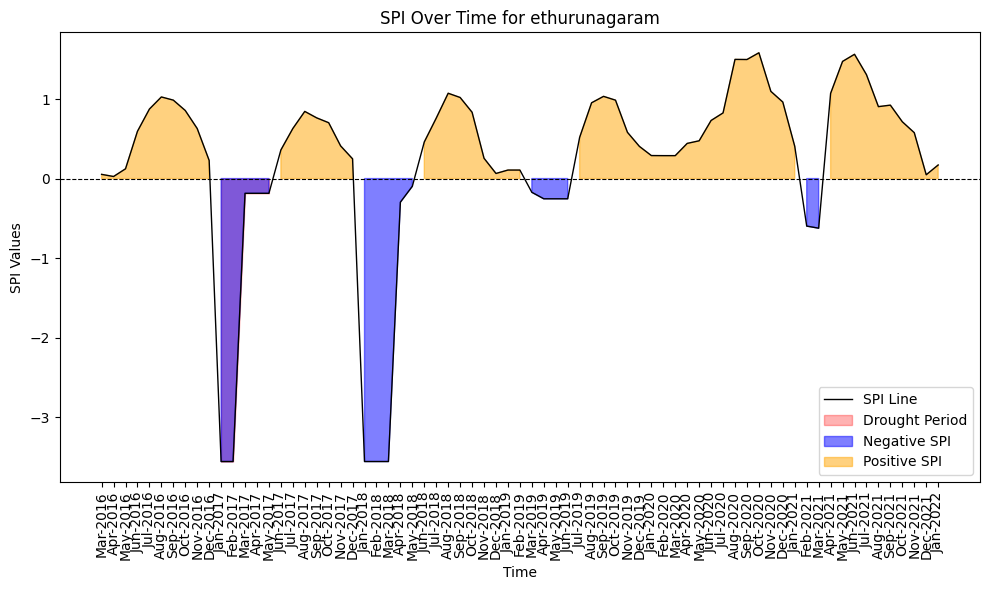

The largest drought period in ethurunagaram is from Jan-2017 till May-2017


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


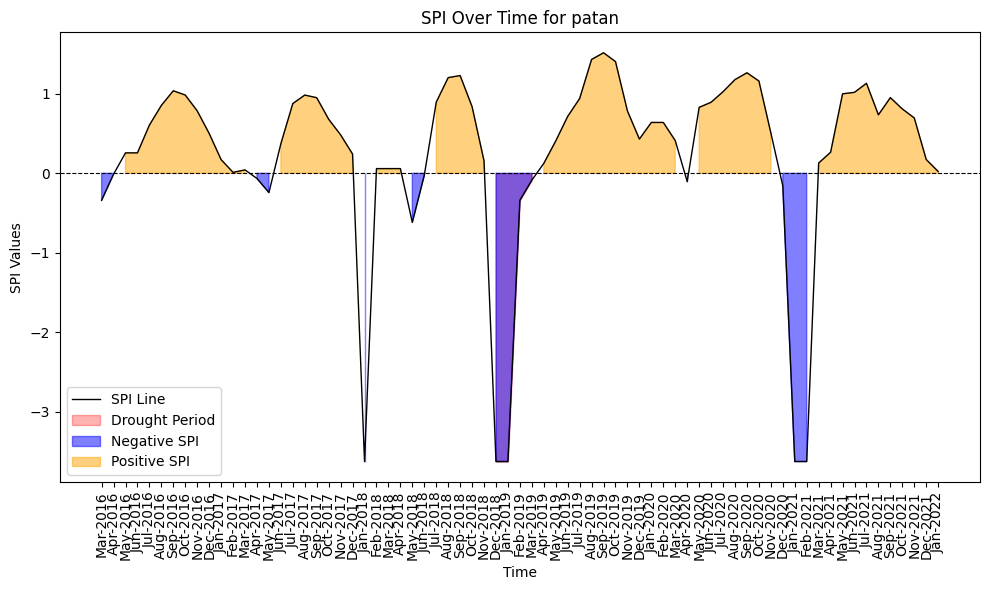

The largest drought period in patan is from Dec-2018 till Mar-2019


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


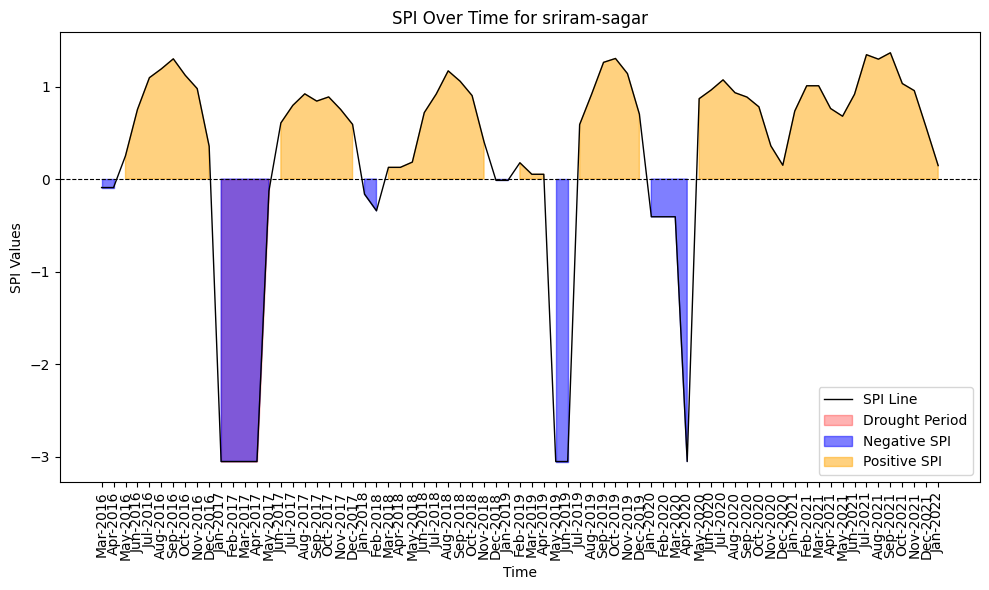

The largest drought period in sriram-sagar is from Jan-2017 till May-2017


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


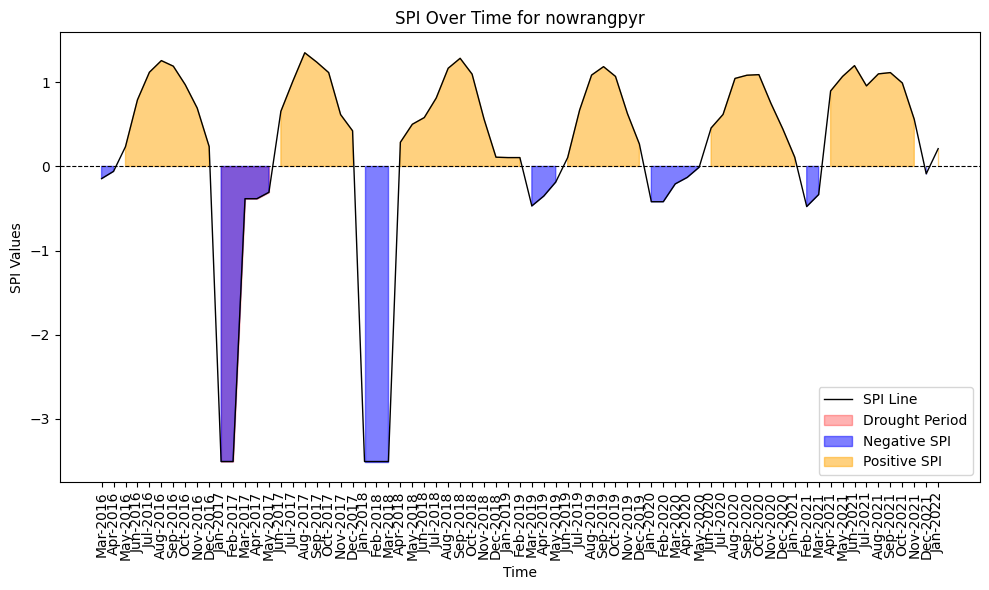

The largest drought period in nowrangpyr is from Jan-2017 till May-2017


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


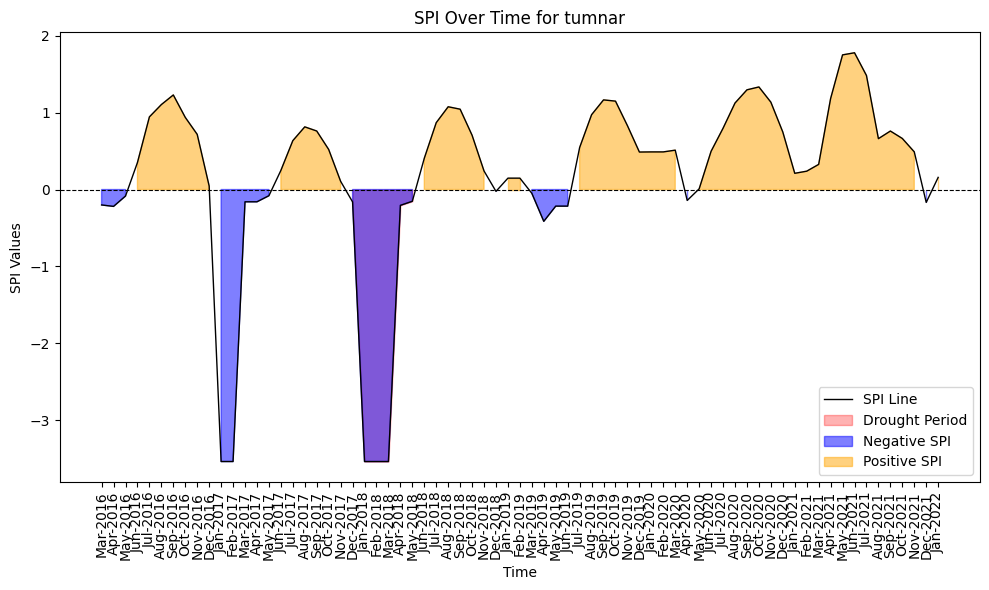

The largest drought period in tumnar is from Dec-2017 till May-2018


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


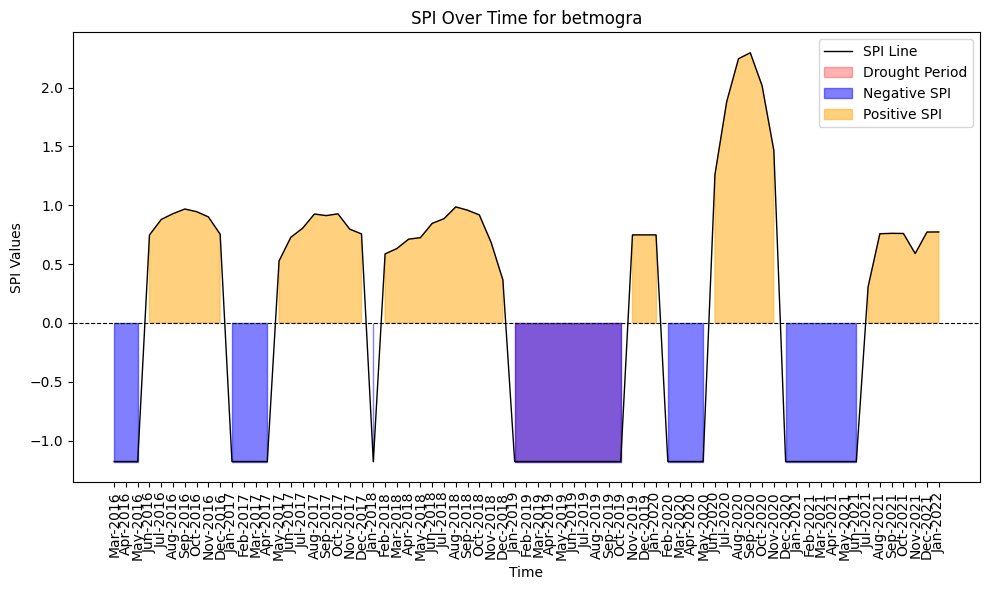

The largest drought period in betmogra is from Jan-2019 till Oct-2019


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


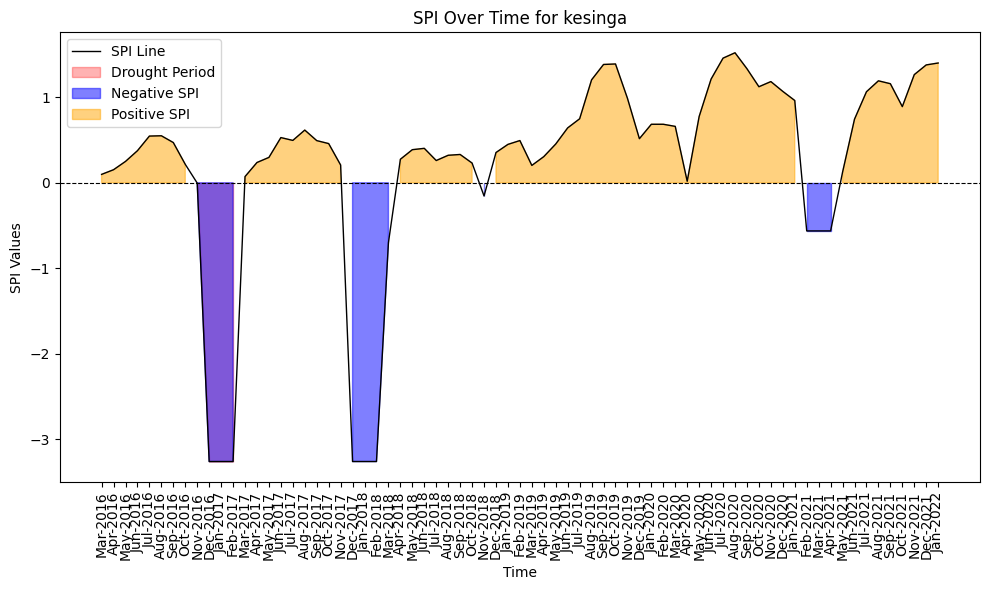

The largest drought period in kesinga is from Nov-2016 till Feb-2017


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


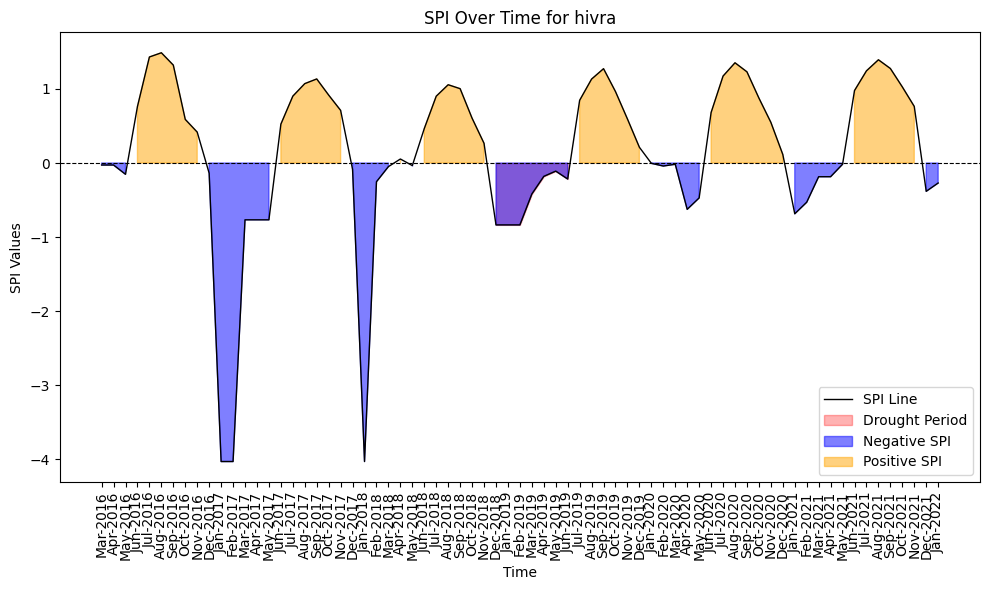

The largest drought period in hivra is from Dec-2018 till Jun-2019


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


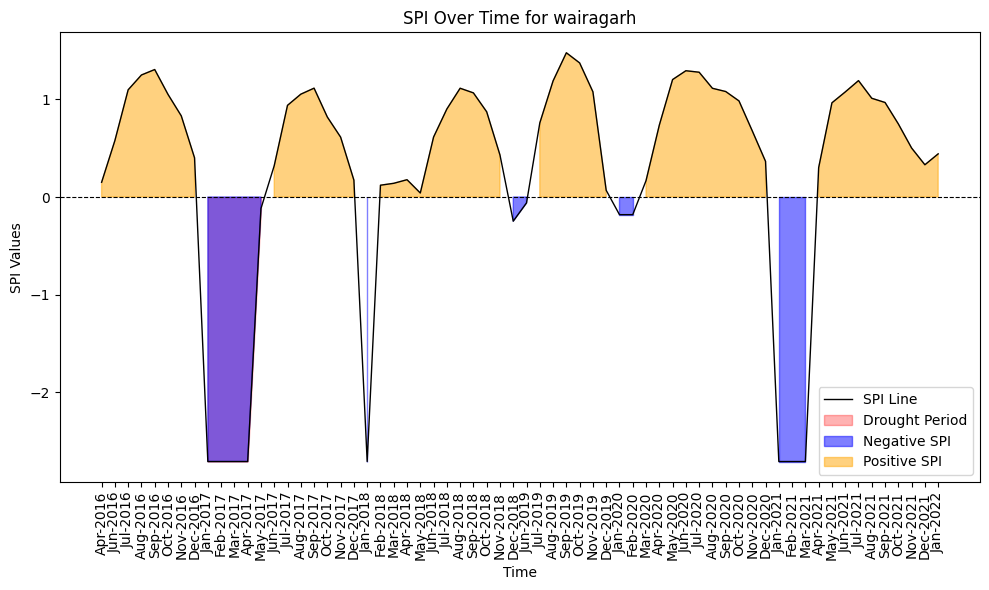

The largest drought period in wairagarh is from Jan-2017 till May-2017


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


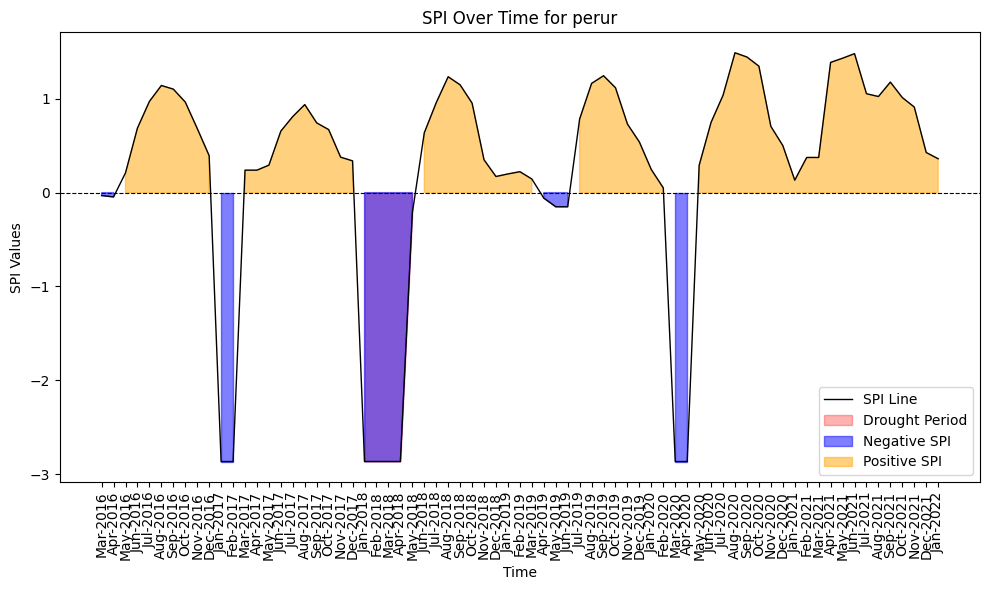

The largest drought period in perur is from Jan-2018 till May-2018


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


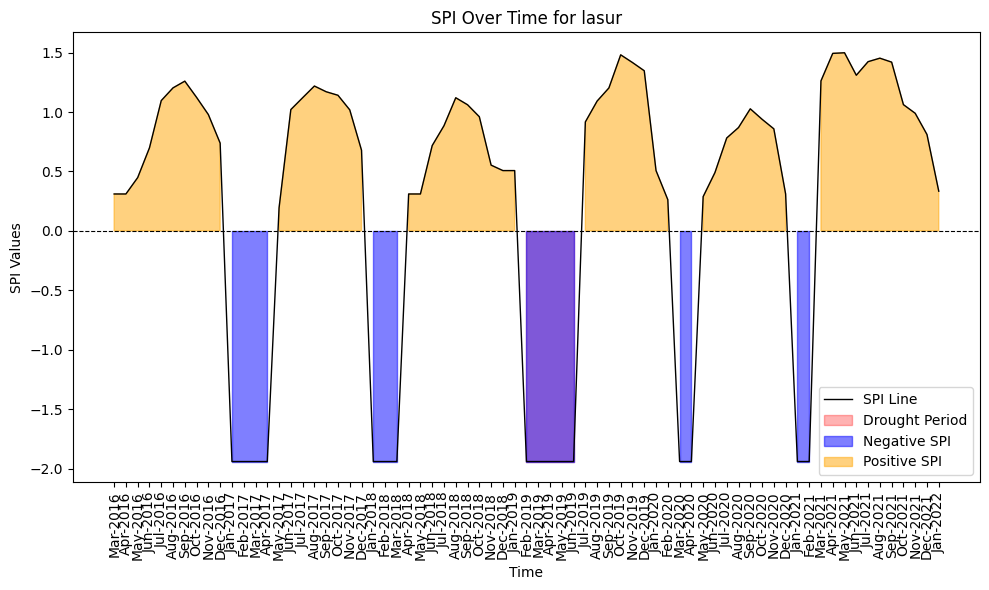

The largest drought period in lasur is from Feb-2019 till Jun-2019


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


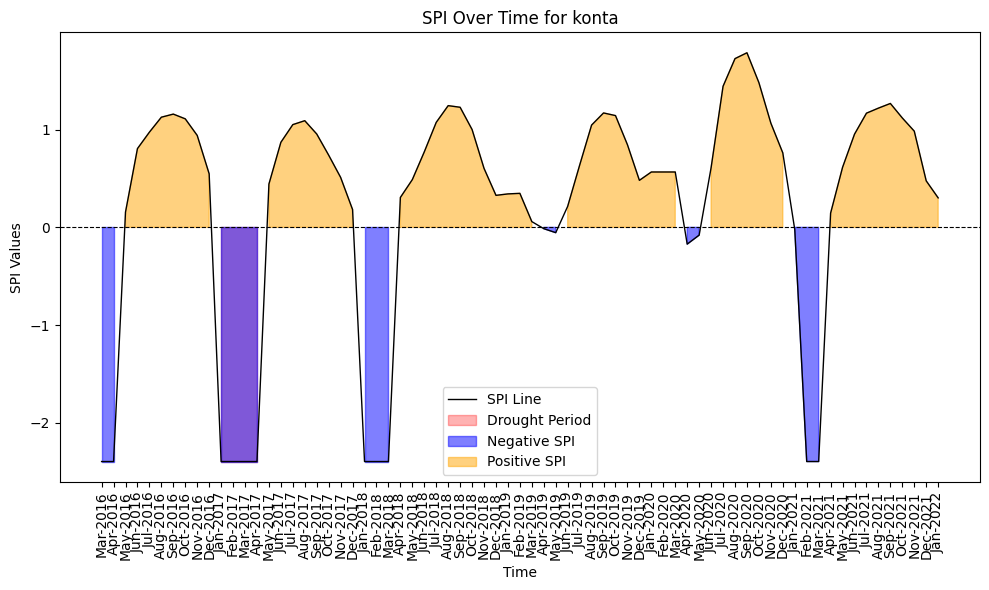

The largest drought period in konta is from Jan-2017 till Apr-2017


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


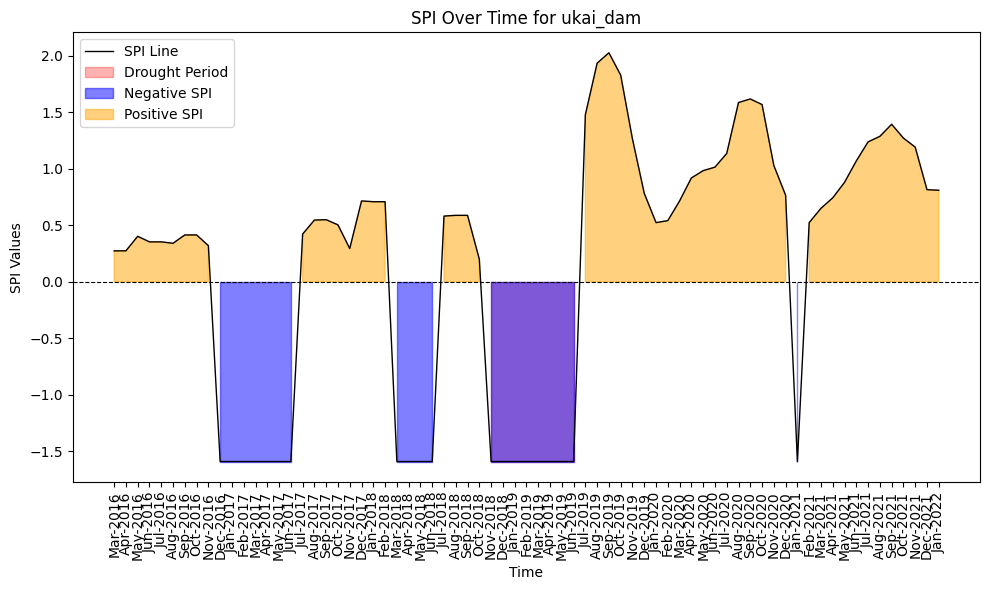

The largest drought period in ukai_dam is from Nov-2018 till Jun-2019


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


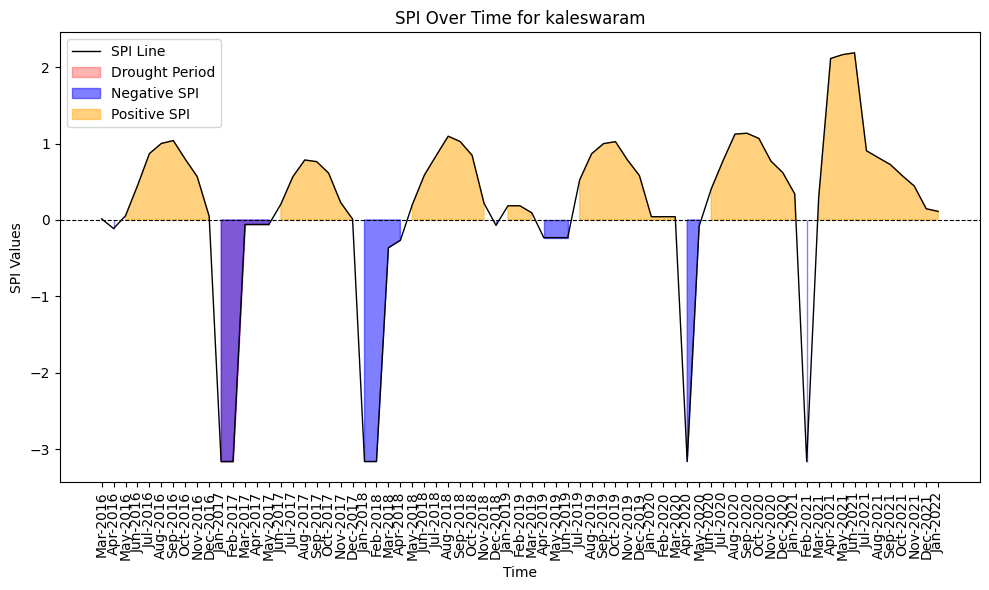

/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


The largest drought period in kaleswaram is from Jan-2017 till May-2017


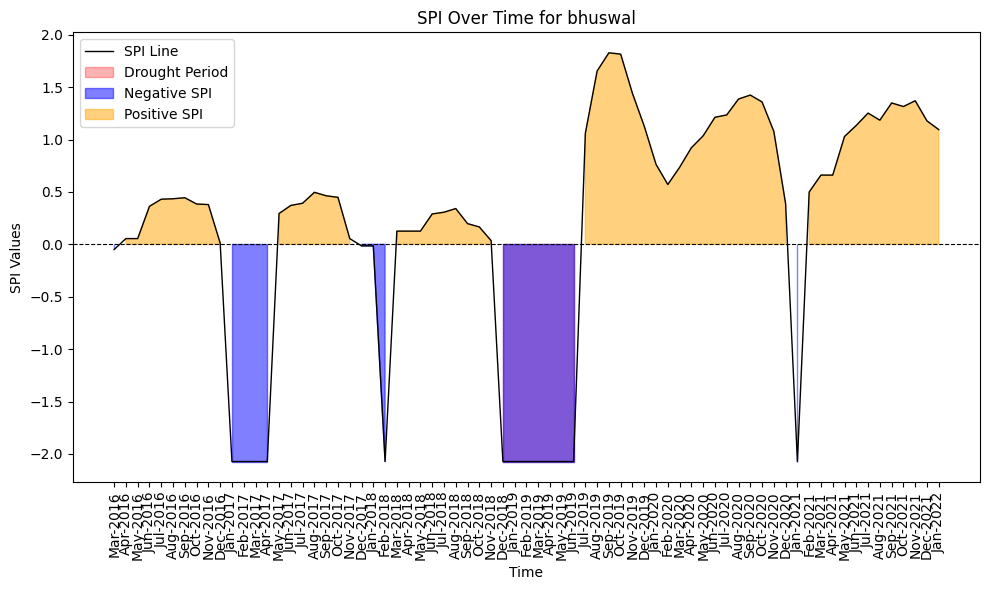

The largest drought period in bhuswal is from Dec-2018 till Jun-2019


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


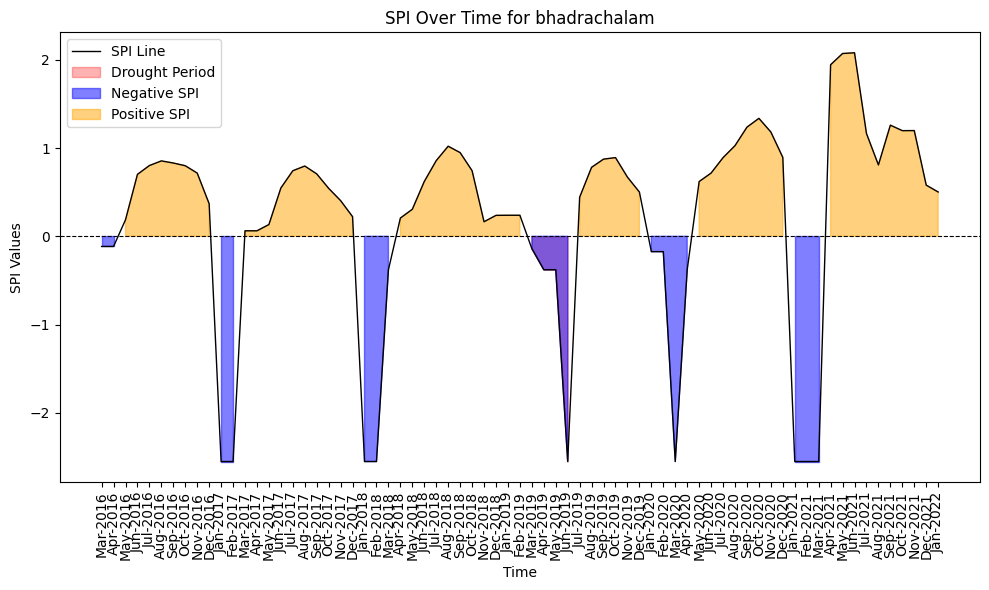

The largest drought period in bhadrachalam is from Mar-2019 till Jun-2019


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


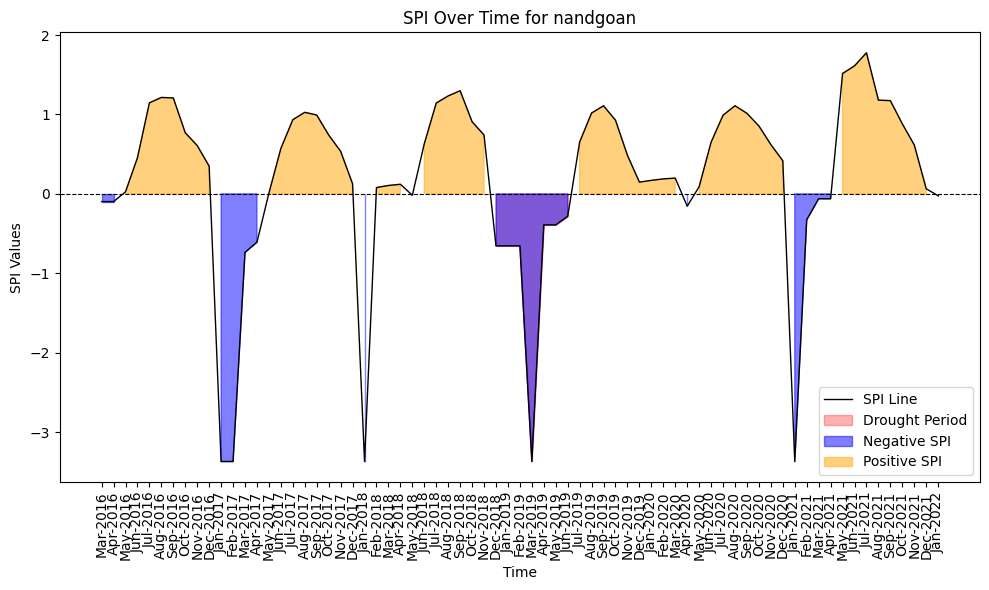

The largest drought period in nandgoan is from Dec-2018 till Jun-2019


/tmp/ipykernel_31083/4022242362.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'])


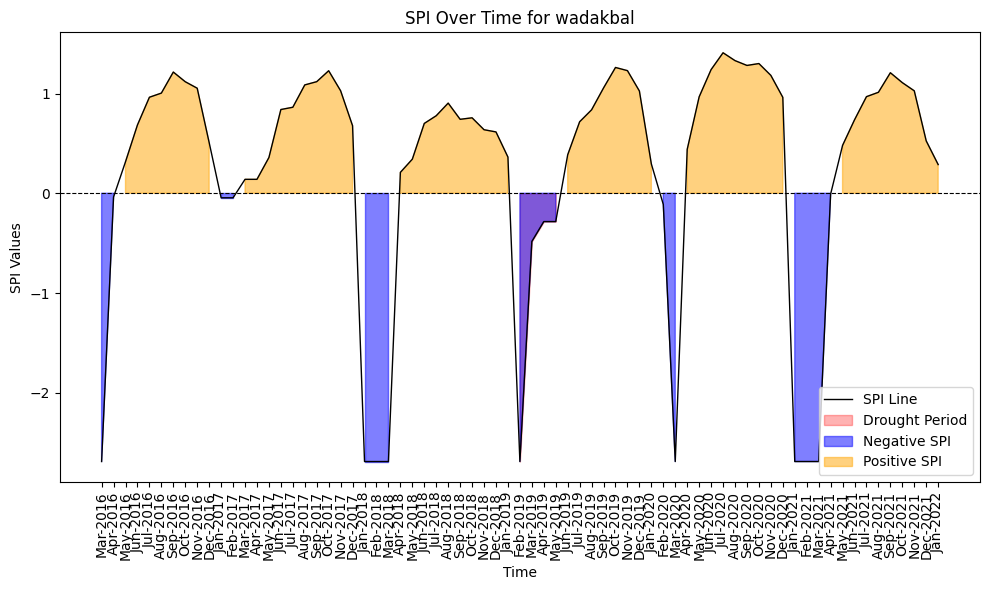

The largest drought period in wadakbal is from Feb-2019 till May-2019


In [37]:
directory = './godavari_basins'
spi_means=[]
freqs=[]

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    if os.path.isfile(filepath):
        spi_vals,date_objects= find_spi(filepath)
        file_name=os.path.splitext(filename)[0]
        plot_spi_with_drought_highlighted(spi_vals,date_objects,file_name)

        spi_mean=np.mean(spi_vals)
        drought_freq=np.sum(spi_vals < 0)

        spi_means.append(spi_mean)
        freqs.append(drought_freq)

freqs=np.array(freqs,dtype=float)        

In [38]:
position = {
    "betmogra.csv":(18.7034,77.5333),
    "bhadrachalam.csv":(17.6705,80.8938),
    "bhuswal.csv":(21.06,71.78),
    "dowlaiswaram.csv":(16.9558,81.7927),
    "ethuranagaram.csv":(18.34,80.4281),
    "hivra.csv":(20.54,78.32),
    "kaleswaram.csv":(18.8110,79.9067),
    "kesinga.csv":(20.28,83.22),
    "koida.csv":(17.47,81.39),
    "konta.csv":(17.82,81.39),
    "lasur.csv":(19.492,74.951),
    "nandgaon.csv":(20.52,78.8),
    "nowrangpyr.csv":(19.2,82.53),
    "patan.csv":(23.31,79.66),
    "perur.csv":(18.55,80.39),
    "salebardi.csv":(20.91,79.93),
    "simga.csv":(21.63,81.68),
    "sriram-sagar.csv":(18.58,78.20),
    "tumnar.csv":(19.01,81.23),
    "ukai_dam.csv":(21.25,73.59),
    "wadakbal.csv":(17.53,75.88),
    "wairagarh.csv":(20.43,80.10)
}

latitudes = []
longitudes = []

# Extract latitudes and longitudes from the position dictionary
for location, coordinates in position.items():
    latitudes.append(coordinates[0])
    longitudes.append(coordinates[1])
    


[12. 19. 14. 17. 16. 15. 17. 21. 21. 29. 12. 33. 13. 14. 16. 16. 20. 17.
 16. 18. 21. 17.] [0.2660666147707958, 0.20264956143492782, 0.26318108197849094, 0.19802297842315517, 0.23585690883520602, 0.24973492549588552, 0.2623295496202845, 0.23011842464706067, 0.22561571357270574, 0.06775424676525135, 0.24236492684640043, 0.1597066216708691, 0.26703242306636343, 0.2607433067666461, 0.2603366871825821, 0.2552694473574726, 0.1599855648990183, 0.1995361441602313, 0.19055343449834686, 0.20732183203816093, 0.2021635331321075, 0.2698100708592662]


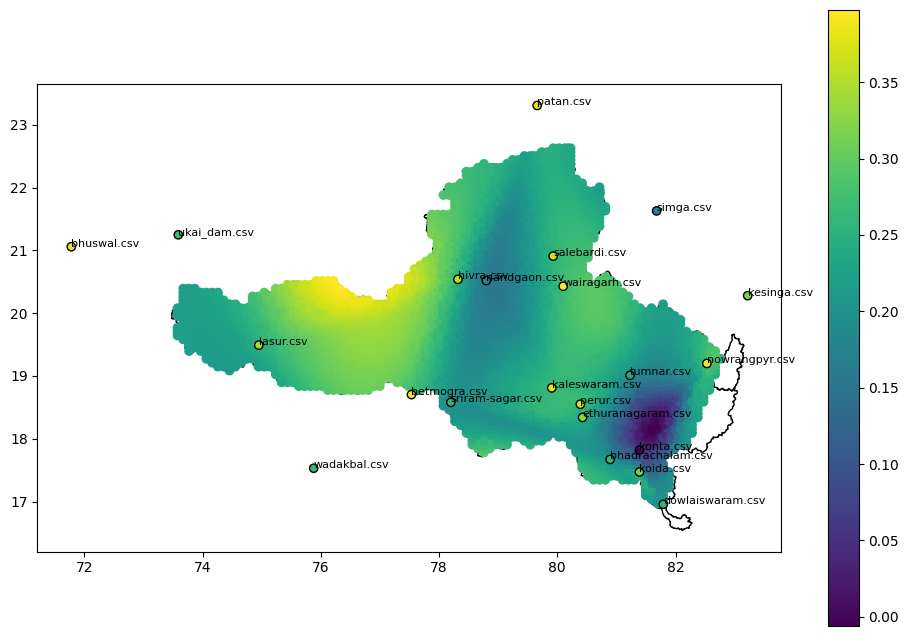

In [32]:
# Load the river basin shapefile
area_of_interest = gpd.read_file("./shapefile/godavari_shp.geojson")

# Define station data
station_data = {
    'Frequency': freqs,
    'SPI': spi_means,
    'Longitude': longitudes,
    'Latitude': latitudes,
}

print(freqs,spi_means)
xmin, ymin, xmax, ymax = area_of_interest.total_bounds
# print(xmin, ymin, xmax, ymax)
grid_x, grid_y = np.meshgrid(np.linspace(xmin, xmax, num=100), np.linspace(ymin, ymax, num=100))

grid_z = griddata((station_data['Longitude'], station_data['Latitude']), station_data['SPI'], (grid_x, grid_y), method='cubic')
interpolated_grid = gpd.GeoDataFrame(
    {'value': grid_z.flatten()},
    geometry=gpd.points_from_xy(grid_x.flatten(), grid_y.flatten()), crs=area_of_interest.crs
)
clipped_interpolated_grid = gpd.clip(interpolated_grid, area_of_interest)

# plt.figure(figsize=(12, 8))
area_of_interest.plot(figsize=(12, 8), color='white', edgecolor='black')
clipped_interpolated_grid.plot(column='value',  ax=plt.gca(), legend=True)
plt.scatter(station_data['Longitude'], station_data['Latitude'], c=station_data['SPI'], edgecolor='black', label='Data Points')

for i, txt in enumerate(position.keys()):
    plt.annotate(txt, (station_data['Longitude'][i], station_data['Latitude'][i]), fontsize=8, ha='left')

plt.show()

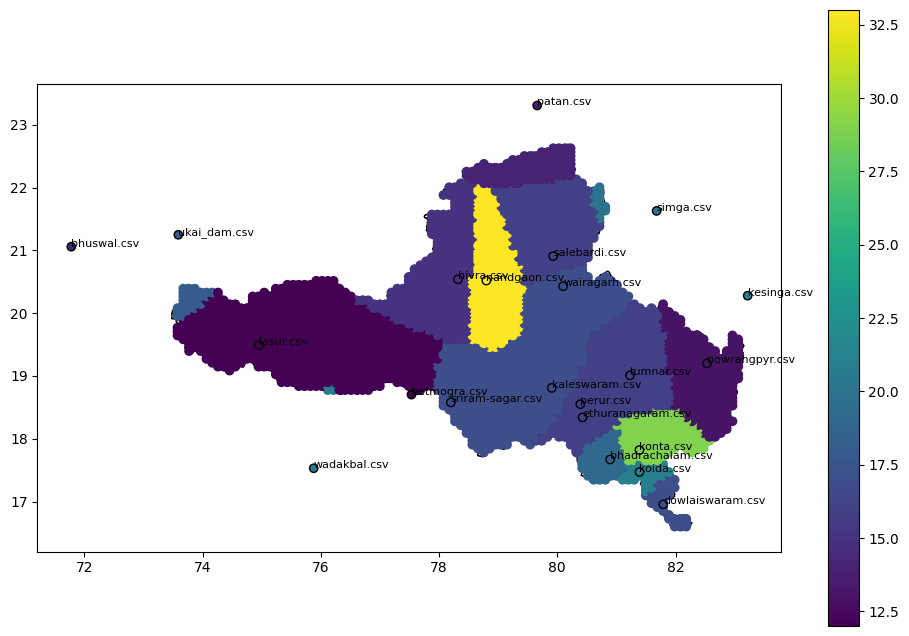

In [33]:
xmin, ymin, xmax, ymax = area_of_interest.total_bounds
    # print(xmin, ymin, xmax, ymax)
grid_x, grid_y = np.meshgrid(np.linspace(xmin, xmax, num=100), np.linspace(ymin, ymax, num=100))

grid_z = griddata((station_data['Longitude'], station_data['Latitude']), station_data['Frequency'], (grid_x, grid_y), method='nearest')
interpolated_grid = gpd.GeoDataFrame(
    {'value': grid_z.flatten()},
    geometry=gpd.points_from_xy(grid_x.flatten(), grid_y.flatten()), crs=area_of_interest.crs
    )
clipped_interpolated_grid = gpd.clip(interpolated_grid, area_of_interest)

    # plt.figure(figsize=(12, 8))
area_of_interest.plot(figsize=(12, 8), color='white', edgecolor='black')
clipped_interpolated_grid.plot(column='value',  ax=plt.gca(), legend=True)
plt.scatter(station_data['Longitude'], station_data['Latitude'], c=station_data['Frequency'], edgecolor='black', label='Data Points')

for i, txt in enumerate(position.keys()):
    plt.annotate(txt, (station_data['Longitude'][i], station_data['Latitude'][i]), fontsize=8, ha='left')

plt.show()

In [34]:
from scipy.interpolate import griddata
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [35]:

def load_shapefile(filepath):
    """Load river basin shapefile."""
    return gpd.read_file(filepath)

def create_station_data(drought_frequencies, average_spi_values, station_longitudes, station_latitudes):
    """Create station data dictionary."""
    return {
        'Frequency': drought_frequencies,
        'SPI': average_spi_values,
        'Longitude': station_longitudes,
        'Latitude': station_latitudes,
    }

def calculate_grid(river_basin_shapefile):
    """Calculate grid points within the bounds of the river basin shapefile."""
    basin_xmin, basin_ymin, basin_xmax, basin_ymax = river_basin_shapefile.total_bounds
    grid_x, grid_y = np.meshgrid(np.linspace(basin_xmin, basin_xmax, num=100), np.linspace(basin_ymin, basin_ymax, num=100))
    return grid_x, grid_y

def interpolate_data(station_data, grid_x, grid_y):
    """Interpolate station SPI data onto the grid using cubic method."""
    grid_z = griddata((station_data['Longitude'], station_data['Latitude']), station_data['SPI'], (grid_x, grid_y), method='cubic')
    return grid_z

def create_interpolated_grid(grid_x, grid_y, grid_z, river_basin_shapefile):
    """Create a GeoDataFrame from the interpolated grid data."""
    interpolated_grid = gpd.GeoDataFrame(
        {'value': grid_z.flatten()},
        geometry=gpd.points_from_xy(grid_x.flatten(), grid_y.flatten()), 
        crs=river_basin_shapefile.crs
    )
    clipped_interpolated_grid = gpd.clip(interpolated_grid, river_basin_shapefile)
    return clipped_interpolated_grid

def plot_data(river_basin_shapefile, clipped_interpolated_grid, station_data):
    """Plot river basin shapefile, interpolated grid, and station data."""
    river_basin_shapefile.plot(figsize=(12, 8), color='white', edgecolor='black')
    clipped_interpolated_grid.plot(column='value',  ax=plt.gca(), legend=True)
    plt.scatter(station_data['Longitude'], station_data['Latitude'], c=station_data['SPI'], edgecolor='black', label='Data Points')
    for i, station_name in enumerate(station_data.keys()):
        plt.annotate(station_name, (station_data['Longitude'][i], station_data['Latitude'][i]), fontsize=8, ha='left')
    plt.show()

# Load the river basin shapefile
river_basin_shapefile = load_shapefile("./shapefile/godavari_shp.geojson")

# Define station data
station_data = create_station_data(drought_frequencies, average_spi_values, station_longitudes, station_latitudes)

# Calculate grid
grid_x, grid_y = calculate_grid(river_basin_shapefile)

# Interpolate data
grid_z = interpolate_data(station_data, grid_x, grid_y)

# Create interpolated grid
clipped_interpolated_grid = create_interpolated_grid(grid_x, grid_y, grid_z, river_basin_shapefile)

# Plot data
plot_data(river_basin_shapefile, clipped_interpolated_grid, station_data)




NameError: name 'drought_frequencies' is not defined